# Complete Feature Engineering Guide

# Types of encoding techniques

### This is basically for categorical variables

#### Nominal categories are something that does not need to be ordered 
- gender, state etc

#### Ordinal categories can be arranged based on a rank 
- Education- BE, Bcom, PHD, Masters

# There are 2 types of encoding - Nominal and ordinal encoding

### Nominal Encoding
- One hot encoding (does not work well when number of categories are more and leads to curse of dimensionality)
- One hot encoding with many categorical variable ( select most repeating category values and apply 1 hot encoding to this)
- mean encoding ( The mean of the feature categories would be replaced to that feature column )

### Ordinal Encoding
- label encoding ( Creates rank based on the category values like PHD-1, Masters-2, BE-3, Bcom-4 )
- target guided ordinal encoding ( We calculate mean for the feature categories wrt to output and based on the mean, the highest mean would be given a highest score which is the label, followed by the 2nd highest etc)

# Feature Scaling

### Convergence happens quickly to the global minima when we scale the data
- Feature scaling is efficient in linear regression as it has the slope and co-efficient that needs to reach minima quickly, KNN, Kmeans works on eucledian distance and if the distance is more then, computation time is more.
- Feature Scaling is not necessary for ensemble techniques because they use decision trees to find the relation.

# Handeling missing values
- Delete rows with missing values (feasible when data is huge)
- Replace with most frequesnt value (might lead to imbalanced dataset)
- Apply classifer algorithm (the rows that have no missing value will be training data and rows with missing value will be test data and the output value will be that missing feature for classification)
- Apply unsupervised ML (Kmeans clustering method to form clusters and then select the missing value to be one in that cluster)

# FEATURE ENGINEERING _ HANDELING MISSING VALUES

### Few of the common missing data falls under these categories

- Missing Completly at Random (MCAR) 
    - When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.

- Missing Data Not at Random (MNAR) 
    - Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.
  
- Missing at Random (MAR) 
    - Missing at random (MAR) occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information. Since MAR is an assumption that is impossible to verify statistically, we must rely on its substantive reasonableness.

## Techniques to handel missing values
- Mean/ Median/Mode replacement
- Random Sample Imputation
- Capturing NAN values with a new feature
- End of Distribution imputation
- Arbitrary imputation
- Frequent categories imputation

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\titanic.csv")

In [3]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Embarked seems like it is a value that is missing completely at random (MCAR) because it has only 2 values missing
#### Since there is no relationship that these values are missing we can drop these rows

In [11]:
data[data['Embarked'].isna()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

#### Since the data is collected after the titanic accident we cannot specify how many people were in the cabin hence these might be missing values. And there is a reason why the values are missing and this example falls under Missing Data Not at Random (MNAR)

In [15]:
import numpy as np

# if Cabin value is null then 1 else 0
data['cabin_null'] = np.where(data['Cabin'].isna(), 1, 0)

# Total percentage of null
data['cabin_null'].mean()

# This means 77% of the total values in feature cabin_null are NaN

0.7710437710437711

In [17]:
# checking to see how many people survived wrt people present in cabin
data.groupby(['Survived'])['cabin_null'].mean()

# it can be seen that 87% of the people who survived had a cabin entry the remaining 60% who did not have a cabin entry

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## 1) Mean/ Median/Mode replacement
- Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

#### Now the feature age has few missing values and this is where we can say that few people hesitate to give out their age hence this can be considered as values missing at Random (MAR)

In [18]:
# Lets select only few columns for this experiment

df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\titanic.csv", usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [19]:
## Lets go and see the percentage of missing values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

#### imputing median value to the missing values in age as only 19% of the values are missing and mean would not be a right imputation approach

In [20]:
# function to impute median values

def impute_nan(df, feature, median):
    df[feature+"_median"]=df[feature].fillna(median)

In [21]:
# lets impute this median value to all the missing values

median = df.Age.median()
median

28.0

In [22]:
impute_nan(df,'Age',median)
df.head()

Survived   Age     Fare  Age_median
0         0  22.0   7.2500        22.0
1         1  38.0  71.2833        38.0
2         1  26.0   7.9250        26.0
3         1  35.0  53.1000        35.0
4         0  35.0   8.0500        35.0

In [23]:
# lets check if there is a huge impact on the standard deviation before and after imputation

print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [24]:
# there is just a slight reduction in the standard deviation value, hence it is okay.

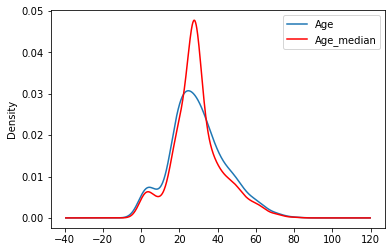

In [25]:
# let's check for the impact after performing the above operation
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### We can see a large increase in the slope of the Age_median feature which can probably affect the models performance and there are chances that this solution might overfit 

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
- Easy to implement(Robust to outliers)
- Faster way to obtain the complete dataset 

#### Disadvantages
- Change or Distortion in the original variance
- Impacts Correlation

## 2) Random Sample Imputation

- Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

- When should it be used? It assumes that the data are missing completely at random(MCAR)

In [67]:
# importing and loading the data

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\titanic.csv", usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [68]:
# check for null

df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [69]:
# checking percentage of null values

df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [70]:
df['Age'].isna().sum()

177

In [71]:
# creating random samples by taking samples at random and replacing the 177 NaN values with random values

df['Age'].dropna().sample(df['Age'].isna().sum(), random_state = 12)

830    15.0
478    22.0
12     20.0
625    61.0
690    31.0
       ... 
18     31.0
509    26.0
450    36.0
523    44.0
254    41.0
Name: Age, Length: 177, dtype: float64

In [72]:
# creating a function to comparing median imputation with Random sampling imputation 

def impute_nan(df, feature):
    # for median value
    median = df[feature].median()
    df[feature+"_median_imputation"] = df[feature].fillna(median)

    # For random sample
    df[feature+"_random_imputation"] = df[feature]
    # replacing the NaN values with the random values
    random_sample = df[feature].dropna().sample(df[feature].isna().sum(), random_state = 12)
    # Mapping with the same index 
    random_sample.index = df[df[feature].isna()].index
    # Mapping the random values to the missing NaN values
    df.loc[df[feature].isna(), feature+"_random_imputation"] = random_sample

In [73]:
# calling the function for the Age feature

impute_nan(df, "Age")

In [74]:
df.head()

Survived   Age     Fare  Age_median_imputation  Age_random_imputation
0         0  22.0   7.2500                   22.0                   22.0
1         1  38.0  71.2833                   38.0                   38.0
2         1  26.0   7.9250                   26.0                   26.0
3         1  35.0  53.1000                   35.0                   35.0
4         0  35.0   8.0500                   35.0                   35.0

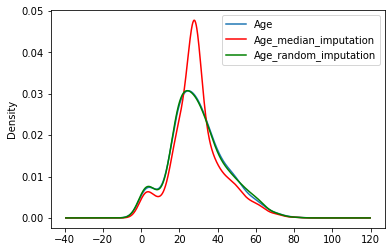

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median_imputation.plot(kind='kde', ax=ax, color='red')
df.Age_random_imputation.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### It can be observed that using random sample the distrotion is absolutely similar to the original distribution of the Age feature when compared to the median imputation

### In this scenario random sample imputation works really well

#### Advantages
- Easy To implement
- There is less distortion in variance

#### Disadvantage
- In every situation randomness wont work

## 3) Capturing NAN values with a new feature

- It captures the importance of the missingness and replaces it with somethingness

- It captures NaN value, or any derived features from the existing features with a new feature

- It works well if the data are missing not at random (MNAR)


In [76]:
# importing and loading the data

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\titanic.csv", usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [77]:
# creating a new feature where the value will be 1 if null else value will be 0

df['Age_NaN'] = np.where(df['Age'].isna(), 1, 0)
df.head()

Survived   Age     Fare  Age_NaN
0         0  22.0   7.2500        0
1         1  38.0  71.2833        0
2         1  26.0   7.9250        0
3         1  35.0  53.1000        0
4         0  35.0   8.0500        0

In [80]:
# once we compute the Age_NaN we can help our model understand the importance of the missing values 
# and that corresponding value can be replaced by any derived features
# In this case lets consider median to be the derived values for the missing feature values

df['Age'].fillna(df.Age.median(), inplace=True)
df.head(10)

Survived   Age     Fare  Age_NaN
0         0  22.0   7.2500        0
1         1  38.0  71.2833        0
2         1  26.0   7.9250        0
3         1  35.0  53.1000        0
4         0  35.0   8.0500        0
5         0  28.0   8.4583        1
6         0  54.0  51.8625        0
7         0   2.0  21.0750        0
8         1  27.0  11.1333        0
9         1  14.0  30.0708        0

#### Advantages
- Easy to implement
- Captures the importance of missing values

#### Disadvantages
- Creating Additional Features(Curse of Dimensionality)

## 4) End of Distribution imputation
- If there is suspicion that the missing value is not at random (MNAR) then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [81]:
# importing and loading the data

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\titanic.csv", usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

<AxesSubplot:>

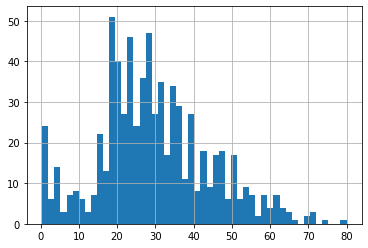

In [83]:
# ploting to see the histogram 

df.Age.hist(bins=50)

#### we can capture the far ending values of the distribution and replace them with the NaN values

#### we capture data from the 3rd standard deviation

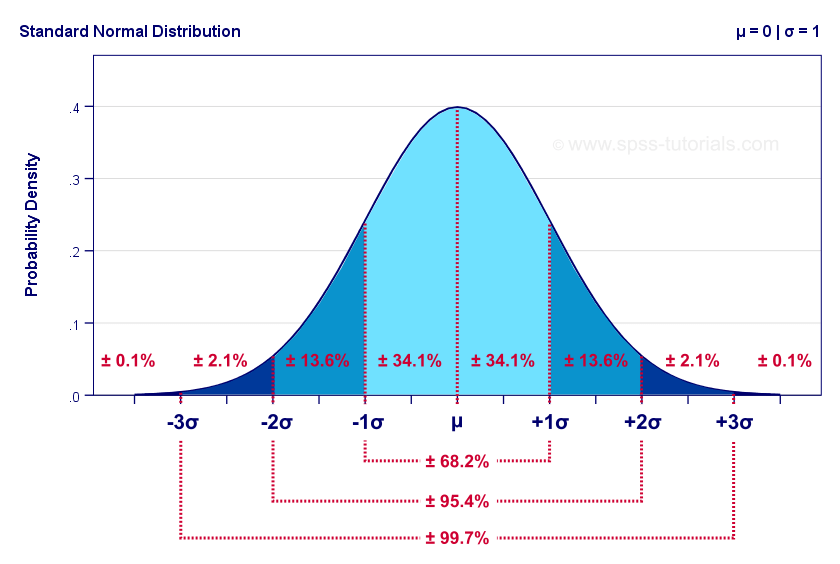

In [84]:
# capturing the values after the 3rd std 

df.Age.mean() + 3 * df.Age.std()

73.27860964406095

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

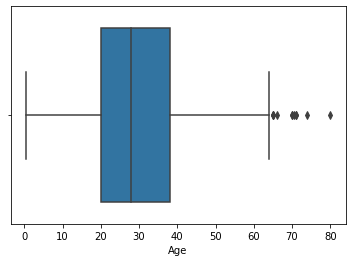

In [85]:
# checking for outliers and distribution using box plot

import seaborn as sns

sns.boxplot('Age', data=df)


#### Lets replace the NaN values by the extreme values

In [86]:
# creating a function to comparing median imputation, Random sampling imputation and end distribution imputation

def impute_nan(df, feature):
    # for median value
    median = df[feature].median()
    df[feature+"_median_imputation"] = df[feature].fillna(median)

    # For random sample
    df[feature+"_random_imputation"] = df[feature]
    # replacing the NaN values with the random values
    random_sample = df[feature].dropna().sample(df[feature].isna().sum(), random_state = 12)
    # Mapping with the same index 
    random_sample.index = df[df[feature].isna()].index
    # Mapping the random values to the missing NaN values
    df.loc[df[feature].isna(), feature+"_random_imputation"] = random_sample
    
    # For end distribution
    extreme = df[feature].mean() + 3 * df[feature].std()
    df[feature+"_EndDistribution_imputation"] = df[feature].fillna(extreme)

In [88]:
impute_nan(df, "Age")

In [89]:
df.head()

Survived   Age     Fare  Age_median_imputation  Age_random_imputation  \
0         0  22.0   7.2500                   22.0                   22.0   
1         1  38.0  71.2833                   38.0                   38.0   
2         1  26.0   7.9250                   26.0                   26.0   
3         1  35.0  53.1000                   35.0                   35.0   
4         0  35.0   8.0500                   35.0                   35.0   

   Age_EndDistribution_imputation  
0                            22.0  
1                            38.0  
2                            26.0  
3                            35.0  
4                            35.0

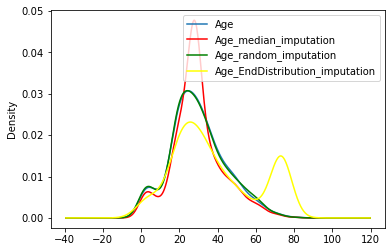

In [90]:
# checking the distribution 

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median_imputation.plot(kind='kde', ax=ax, color='red')
df.Age_random_imputation.plot(kind='kde', ax=ax, color='green')
df.Age_EndDistribution_imputation.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:>

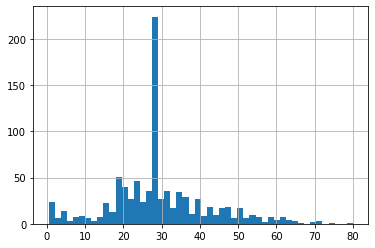

In [91]:
# now replace the Age NaN Values by the median value of Age to check for distribution using histogram
# since we imputed median values we get huge distortion in the center

df["Age"].fillna(median,inplace=True)

df['Age'].hist(bins=50)


<AxesSubplot:>

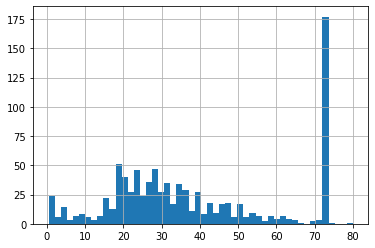

In [92]:
# Now checkind for the end of distribution's distribution
# since we imputed extreme values we get huge distortion in the end

df['Age_EndDistribution_imputation'].hist(bins=50)


C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_EndDistribution_imputation'>

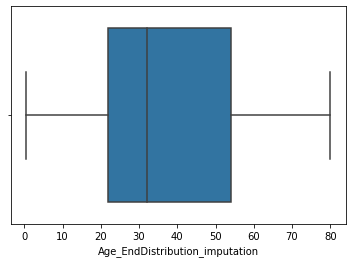

In [93]:
# To check which one is better median or end imputation we create a box plot
sns.boxplot('Age_EndDistribution_imputation',data=df)


#### We can see that the outliers are captured by end of distribution and this gives us a proper distribution 

#### Advantages
- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated into production (during model deployment)
- Captures the importance of “missingness” if there is one

#### Disadvantages
- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset
- This technique may mask true outliers in the distribution

## 5) Arbitrary imputation
- Arbitrary imputation is based on random choice or personal whim, rather than any reason or system.
- Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable with an arbitrary value. The arbitrary value should be different from the mean or median and not within the normal values of the variable. This method is suitable for numerical and categorical variables.
- We can use arbitrary values such as 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive)

In [2]:
# importing and loading the data

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\titanic.csv", usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [6]:
# creating a function to compare other imputation with arbitrary imputation

def impute_nan(df, feature):
    # for median value
    median = df[feature].median()
    df[feature+"_median_imputation"] = df[feature].fillna(median)

    # For random sample
    df[feature+"_random_imputation"] = df[feature]
    # replacing the NaN values with the random values
    random_sample = df[feature].dropna().sample(df[feature].isna().sum(), random_state = 12)
    # Mapping with the same index 
    random_sample.index = df[df[feature].isna()].index
    # Mapping the random values to the missing NaN values
    df.loc[df[feature].isna(), feature+"_random_imputation"] = random_sample
    
    # For end distribution
    extreme = df[feature].mean() + 3 * df[feature].std()
    df[feature+"_EndDistribution_imputation"] = df[feature].fillna(extreme)
    
    # Arbitiary value imputation
    df[feature+"_Arbitiary_imputation"] = df[feature].fillna(99)

In [10]:
impute_nan(df, 'Age')

In [11]:
df.head()

Survived   Age     Fare  Age_median_imputation  Age_random_imputation  \
0         0  22.0   7.2500                   22.0                   22.0   
1         1  38.0  71.2833                   38.0                   38.0   
2         1  26.0   7.9250                   26.0                   26.0   
3         1  35.0  53.1000                   35.0                   35.0   
4         0  35.0   8.0500                   35.0                   35.0   

   Age_EndDistribution_imputation  Age_Arbitiary_imputation  
0                            22.0                      22.0  
1                            38.0                      38.0  
2                            26.0                      26.0  
3                            35.0                      35.0  
4                            35.0                      35.0

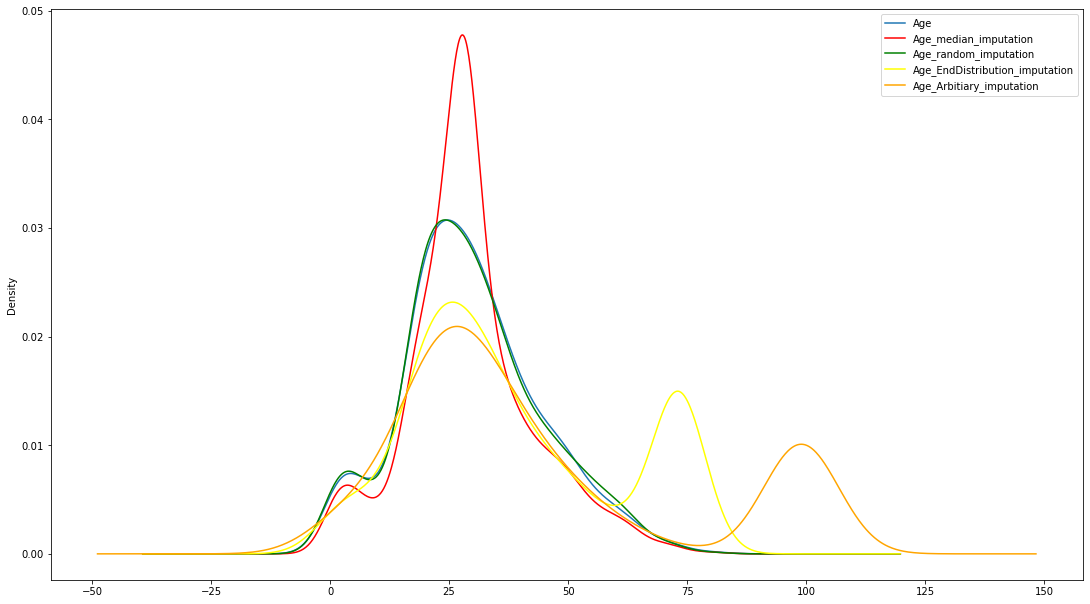

In [18]:
# checking the distribution 

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot()
df['Age'].plot(kind='kde', ax=ax)
df.Age_median_imputation.plot(kind='kde', ax=ax, color='red')
df.Age_random_imputation.plot(kind='kde', ax=ax, color='green')
df.Age_EndDistribution_imputation.plot(kind='kde', ax=ax, color='yellow')
df.Age_Arbitiary_imputation.plot(kind='kde', ax=ax, color='orange')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:>

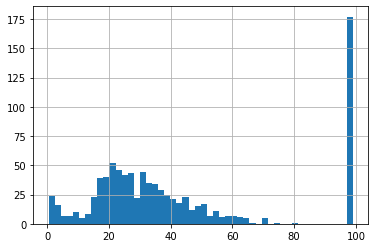

In [19]:
# Now checking for the Arbitrary imputation's distribution
# since we imputed extreme values we get huge distortion in the end
df['Age_Arbitiary_imputation'].hist(bins=50)


#### Advantages
- Easy to implement
- Captures the importance of missingess if there is one

#### Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

## 6) Handeling Categorical Missing Values

   ### 1) Frequent categories imputation
- We replace NaN with the most frequently appearing category value

In [44]:
# importing and loading the data

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\loan.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [45]:
#Lets pick up few of the categorical features that have missing values from the dataset
df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\loan.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [46]:
# lets check for the percentage of missing values
df.isna().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

##### compute the frequency with every feature


<AxesSubplot:>

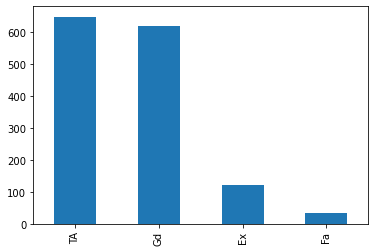

In [47]:
# For the feature BsmtQual we can notice that the value TA is occuring most of the time and let's plot them

df['BsmtQual'].value_counts().plot.bar()


<AxesSubplot:>

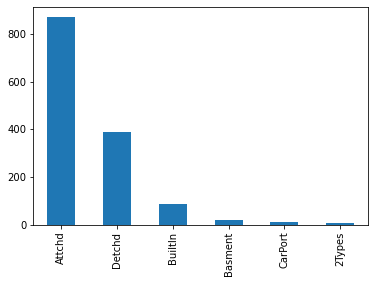

In [48]:
# For the feature GarageType we can notice that the value Attchd is occuring most of the time and let's plot them

df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

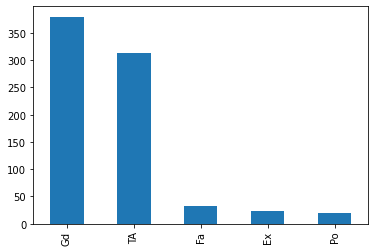

In [49]:
# For the feature FireplaceQu we can notice that the value Gd is occuring most of the time and let's plot them

df['FireplaceQu'].value_counts().plot.bar()

In [50]:
# testing to get the first value
df['FireplaceQu'].value_counts().index

Index(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype='object')

In [51]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [52]:
# Lets write a function to impute the missing values for the categorical feature values

def impute_nan(df, feature):
    most_frequent_category = df[feature].mode()[0]
    df[feature +'_most_frequent_category'] = df[feature].fillna(most_frequent_category)

In [53]:
# iterating through all the categorical features

features_with_missing_values = ['BsmtQual','FireplaceQu','GarageType']

for feature in features_with_missing_values:
    impute_nan(df, feature)

In [54]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice BsmtQual_most_frequent_category  \
0       Gd         NaN     Attchd     208500                              Gd   
1       Gd          TA     Attchd     181500                              Gd   
2       Gd          TA     Attchd     223500                              Gd   
3       TA          Gd     Detchd     140000                              TA   
4       Gd          TA     Attchd     250000                              Gd   

  FireplaceQu_most_frequent_category GarageType_most_frequent_category  
0                                 Gd                            Attchd  
1                                 TA                            Attchd  
2                                 TA                            Attchd  
3                                 Gd                            Detchd  
4                                 TA                            Attchd

In [55]:
# checking for missing values in the derived features

df.isna().mean()

BsmtQual                              0.025342
FireplaceQu                           0.472603
GarageType                            0.055479
SalePrice                             0.000000
BsmtQual_most_frequent_category       0.000000
FireplaceQu_most_frequent_category    0.000000
GarageType_most_frequent_category     0.000000
dtype: float64

#### Advantages
- Easy To implement
- Fater way to implement 

#### Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

### 2) Adding a variable to capture NAN
- We create a new feature wrt to the existing feature to indicate if the record has NaN value or not

In [59]:
#Lets pick up few of the categorical features that have missing values from the dataset
df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\loan.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [60]:
# adding 1 where the value is NaN else 0 to a new derived feature
# This also captures the importance of the missing value for our ML model

import numpy as np

df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [61]:
# Example of getting the most frequent value for BsmtQual feature

frequent_val = df['BsmtQual'].mode()[0]
frequent_val

'TA'

In [62]:
# Replacing the missing values with the frequent_val

df['BsmtQual_Var'].fillna(frequent_val, inplace= True)
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

### 3) Replace NAN with a new category
- Suppose we have more frequent categories, we replace NaN with a new category and replace the missing value with "Missing"

In [63]:
#Lets pick up few of the categorical features that have missing values from the dataset
df = pd.read_csv(r"C:\Users\tejas\Desktop\ineuron\feature engineering\data\loan.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [66]:
# creating a function for imputation
# if value is missing then impute "Missing" else impute the same value

def impute_nan(df,feature):
    df[feature+"_newvar"] = np.where(df[feature].isnull(), "Missing", df[feature])

In [67]:
# iterating through all categorical features to impute

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df, feature)

In [68]:
# we can drop the initial features and keep the derived features

df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

SalePrice BsmtQual_newvar FireplaceQu_newvar GarageType_newvar
0     208500              Gd            Missing            Attchd
1     181500              Gd                 TA            Attchd
2     223500              Gd                 TA            Attchd
3     140000              TA                 Gd            Detchd
4     250000              Gd                 TA            Attchd